## Day 23 Lecture 1 Assignment

In this assignment, we will explore feature selection and dimensionality reduction techniques. We will use both the FIFA ratings dataset and the Chicago traffic crashes dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif, f_regression, mutual_info_regression 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import seaborn as sns
import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
crash_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/traffic_crashes_chicago.csv')
soccer_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/fifa_ratings.csv')

In [3]:
soccer_data.head()

,ID,Name,Overall,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,158023,L. Messi,94,84,95,70,90,86,97,93,94,87,96,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26
1,20801,Cristiano Ronaldo,94,84,94,89,81,87,88,81,76,77,94,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23
2,190871,Neymar Jr,92,79,87,62,84,84,96,88,87,78,95,94,90,96,94,84,80,61,81,49,82,56,36,89,87,81,94,27,24,33
3,192985,K. De Bruyne,91,93,82,55,92,82,86,85,83,91,91,78,76,79,91,77,91,63,90,75,91,76,61,87,94,79,88,68,58,51
4,183277,E. Hazard,91,81,84,61,89,80,95,83,79,83,94,94,88,95,90,94,82,56,83,66,80,54,41,87,89,86,91,34,27,22


We will begin with the Chicago traffic crashes dataset, focusing on removing columns with significant missing data.

Remove all columns with more than 5% missing data from the dataframe. (The *missingness summary* function we wrote a few exercises ago will speed this process up significantly.) Print out the columns that were removed, and the proportion of missing data for each column.

In [4]:
# answer goes here
def null_percentage(df):
  return (df.isnull().sum()*100/df.isnull().count()).round(2)

def missingness_summary(df, print_log=False, sort=None):
  """
  Takes a pandas df and returns a pandas series containing percentage of 
  missing data (null values) in each column.

  Params:
  df : pandas df
  print_log: True or False (default), if true prints out all of the columns and 
            percentages of null values for each column.
  sort : 'ascending', 'descending', None (default), sorts output in ascending or 
          descending if specified.
  """
  missing_values = df.apply(null_percentage)
  
  if sort == 'ascending':
    missing_values = missing_values.sort_values(ascending=True)
  if sort == 'descending':
    missing_values = missing_values.sort_values(ascending=False)

  if print_log:
    print('Printing Missingness Summary')
    for column in missing_values.index:
      print('{} has {} percent missing data'.format(
          column, missing_values[column]
      ))
    print('Missingness Summary completed \n')
  
  return missing_values

In [5]:
missing_data_report = missingness_summary(crash_data, sort='descending')
missing_data_report.loc[missing_data_report > 5]

WORKERS_PRESENT_I         99.84
DOORING_I                 99.66
WORK_ZONE_TYPE            99.44
WORK_ZONE_I               99.29
PHOTOS_TAKEN_I            98.73
STATEMENTS_TAKEN_I        97.98
NOT_RIGHT_OF_WAY_I        95.39
INTERSECTION_RELATED_I    77.95
HIT_AND_RUN_I             72.24
LANE_CNT                  46.71
dtype: float64

In [6]:
missing_data_columns = missing_data_report.loc[missing_data_report > 5].index
crash_data.drop(columns=missing_data_columns, inplace=True)

In [7]:
missing_data_report = missingness_summary(crash_data, sort='descending')
missing_data_report

REPORT_TYPE                      2.30
INJURIES_UNKNOWN                 0.58
INJURIES_REPORTED_NOT_EVIDENT    0.58
INJURIES_NON_INCAPACITATING      0.58
INJURIES_INCAPACITATING          0.58
INJURIES_FATAL                   0.58
INJURIES_TOTAL                   0.58
MOST_SEVERE_INJURY               0.58
INJURIES_NO_INDICATION           0.58
NUM_UNITS                        0.38
LIGHTING_CONDITION               0.00
TRAFFICWAY_TYPE                  0.00
FIRST_CRASH_TYPE                 0.00
POSTED_SPEED_LIMIT               0.00
WEATHER_CONDITION                0.00
DEVICE_CONDITION                 0.00
TRAFFIC_CONTROL_DEVICE           0.00
ROADWAY_SURFACE_COND             0.00
CRASH_DATE                       0.00
ALIGNMENT                        0.00
DATE_POLICE_NOTIFIED             0.00
ROAD_DEFECT                      0.00
CRASH_TYPE                       0.00
DAMAGE                           0.00
PRIM_CONTRIBUTORY_CAUSE          0.00
SEC_CONTRIBUTORY_CAUSE           0.00
STREET_NO   

Next, we will shift our focus to the FIFA ratings dataset and explore univariate feature selection techniques. We will treat "Overall" as the response and the other ratings as features.

Using the correlations between the response and features, identify the 5 features with the greatest univariate correlation to the response.

In [8]:
# answer goes here
soccer_corr = soccer_data.corr()
np.abs(soccer_corr['Overall']).sort_values(ascending=False)[1:6]

Reactions       0.847739
Composure       0.801749
ShortPassing    0.722720
BallControl     0.717933
LongPassing     0.585104
Name: Overall, dtype: float64

In [9]:
overall_corr_features = np.abs(soccer_corr['Overall']).sort_values(ascending=False)[1:6].index
overall_corr_features

Index(['Reactions', 'Composure', 'ShortPassing', 'BallControl', 'LongPassing'], dtype='object')

In [10]:
# soccer_data.corr()[['Overall']].nlargest(6,'Overall')[1:6].index

Use sklearn's "SelectKBest" function to select the top 5 features using two different scoring metrics: f_regression and mutual_info_regression. Print out the top 5 columns that are selected by both. How do they compare to the ones selected by  univariate correlation?

In [11]:
# answer goes here
Y = soccer_data['Overall']
X = soccer_data.drop(columns=['ID', 'Name', 'Overall'])

k = 5
kbest_f = SelectKBest(k=k, score_func=f_regression)
kbest_mut = SelectKBest(k=k, score_func=mutual_info_regression)

X_best_features_f = kbest_f.fit_transform(X, Y)
X_best_features_mut = kbest_mut.fit_transform(X, Y)

X_best_features_f = pd.DataFrame(X_best_features_f,
                                 columns=X.columns[kbest_f.get_support()])

X_best_features_mut = pd.DataFrame(X_best_features_mut,
                                 columns=X.columns[kbest_mut.get_support()])

In [12]:
X_best_features_f.columns

Index(['ShortPassing', 'LongPassing', 'BallControl', 'Reactions', 'Composure'], dtype='object')

In [13]:
X_best_features_mut.columns

Index(['ShortPassing', 'Dribbling', 'BallControl', 'Reactions', 'Composure'], dtype='object')

Univariate Corr = 'Reactions', 'Composure', 'ShortPassing', 'BallControl', 'LongPassing'

KBest_fregress = 'ShortPassing', 'LongPassing', 'BallControl', 'Reactions', 'Composure'

KBest_mutregress = 'ShortPassing', 'Dribbling', 'BallControl', 'Reactions', 'Composure'

'Reactions', 'Composure', 'BallControl', and 'ShortPassing' were in all 3 results. Univariate and KBest with f_regression also had 'LongPassing', while KBest with mutual regression had 'Dribbling'

Shifting our focus from feature selection to dimensionality reduction, perform PCA on the ratings provided, excluding "Overall". Then, answer the following questions:

- What percentage of the total variance is capture by the first component? What about the first two, or first three?
- Looking at the components themselves, how would you interpret the first two components in plain English?

In [14]:
x_features = soccer_data.drop(columns=['ID', 'Name', 'Overall'])
y_target = soccer_data['Overall']
x_features = StandardScaler().fit_transform(x_features)
pca = PCA(n_components=5)
x_pca = pca.fit_transform(x_features)

In [15]:
pca.explained_variance_ratio_

array([0.3908719 , 0.21348826, 0.09910329, 0.0607238 , 0.02777252])

In [23]:
pca.explained_variance_ratio_.sum()

0.7919597681729361

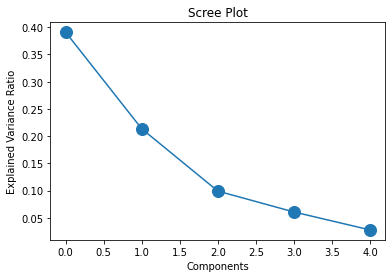

In [16]:
plt.plot(pca.explained_variance_ratio_, marker='o', markersize=12)
plt.xlabel('Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

The total variance explained by all 5 components is 79.2%

The total variance explained per component is:
>39.09% from component 1

>21.35% from component 2

>9.91% from component 3

>6.07% from component 4

>2.78% from component 5

The first two components of the PCA are the two components that retain the maximal amount of variance of the data after having the number of variables reduced.

In [17]:
pca_df = pd.DataFrame(data = x_pca,
                      columns = ['principal component 1', 
                                 'principal component 2',
                                 'principal component 3',
                                 'principal component 4',
                                 'principal component 5'])

In [18]:
pca_df.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5
0,11.832844,-0.242547,0.578543,-0.210673,-0.287149
1,10.581634,-1.515428,2.810661,-3.701690,-0.273542
2,10.785397,0.060371,-0.138087,-0.560872,0.445864
3,9.807196,-3.981132,0.369339,0.576345,0.669708
4,10.614601,-0.219818,-0.145889,-0.499843,0.882936


In [19]:
pca_df = pd.concat([pca_df, y_target, ], axis = 1)
pca_df.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,Overall
0,11.832844,-0.242547,0.578543,-0.210673,-0.287149,94
1,10.581634,-1.515428,2.810661,-3.701690,-0.273542,94
2,10.785397,0.060371,-0.138087,-0.560872,0.445864,92
3,9.807196,-3.981132,0.369339,0.576345,0.669708,91
4,10.614601,-0.219818,-0.145889,-0.499843,0.882936,91


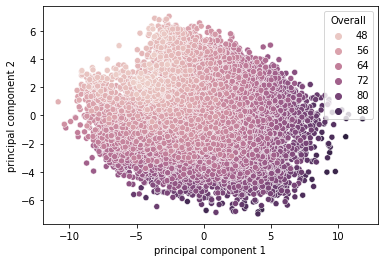

In [20]:
sns.scatterplot(pca_df['principal component 1'], 
                pca_df['principal component 2'],
                hue=pca_df['Overall'])
plt.show()